In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

housing = pd.read_csv('./housing_fill_drop1.csv', index_col=0)
housing.shape
housing 

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
1    909176150        856     126000          30       RL         59.0   
2    905476230       1049     139500         120       RL         42.0   
3    911128020       1001     124900          30  C (all)         60.0   
4    535377150       1039     114000          70       RL         80.0   
5    534177230       1665     227000          60       RL         70.0   
..         ...        ...        ...         ...      ...          ...   
759  903205040        952     121000          30       RL         56.0   
760  905402060       1733     139600          20       RL         65.0   
761  909275030       2002     145000          90       RH         82.0   
762  907192040       1842     217500          60       RL         70.0   
763  906223180       1911     215000          60       RL         80.0   

     LotArea Street Alley LotShape  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1       7890   Pave   Naa      Reg  ...             0         0         166   
2       4235   Pave   Naa      Reg  ...             0         0           0   
3       6060   Pave   Naa      Reg  ...            42        86           0   
4       8146   Pave   Naa      Reg  ...           168         0         111   
5       8400   Pave   Naa      Reg  ...             0         0           0   
..       ...    ...   ...      ...  ...           ...       ...         ...   
759     8854   Pave   Naa      Reg  ...             0         0          40   
760    13680   Pave   Naa      IR1  ...             0         0           0   
761     6270   Pave   Naa      Reg  ...             0         0           0   
762     8826   Pave   Naa      Reg  ...             0         0           0   
763     9554   Pave   Naa      IR1  ...             0         0           0   

    PoolArea Fence MiscVal MoSold YrSold SaleType  SaleCondition  
1          0    Nf       0      3   2010      WD          Normal  
2          0    Nf       0      2   2009      WD          Normal  
3          0    Nf       0     11   2007      WD          Normal  
4          0    Nf       0      5   2009      WD          Normal  
5          0    Nf       0     11   2009      WD          Normal  
..       ...   ...     ...    ...    ...      ...            ...  
759        0    Nf       0      5   2009      WD          Normal  
760        0    Nf       0      6   2009      WD          Normal  
761        0    Nf       0      8   2007      WD          Normal  
762        0    Nf       0      7   2007      WD          Normal  
763        0    Nf       0      9   2006      WD          Normal  

[2580 rows x 79 columns]

In [3]:
pd.set_option('display.max_rows', housing.shape[0]+1)

housing.isna().sum()

PID               0
GrLivArea         0
SalePrice         0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType       14
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
BsmtFullBath      0
BsmtHalfBath      0


In [4]:
values = {'MasVnrType':'Missing', 'Electrical':'Missing'}

housing = housing.fillna(value=values)
housing.isnull().sum(axis=0)

PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr

In [5]:
housing['MSZoning'].dtypes

dtype('O')

In [6]:
housing.shape

(2580, 79)

In [7]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [8]:
# Dropping the columns
housing= housing.drop(["PID","BsmtHalfBath","HalfBath","KitchenAbvGr","BsmtFinSF2","BsmtUnfSF","GarageCars","WoodDeckSF",
                        "OpenPorchSF","EnclosedPorch", "3SsnPorch","ScreenPorch","OverallCond","MSSubClass",
                        "ExterCond" ,"Functional","BsmtCond","BsmtFinType1", "BsmtFinType2","GarageCond","GarageQual",
                         "RoofStyle","RoofMatl","Exterior2nd","MasVnrArea","Utilities","CentralAir",
                        "Fireplaces","PoolArea","Fence","MiscVal","Alley","LandContour",
                        "LotShape", "SaleCondition","SaleType","Condition2","MoSold"], axis=1)

In [9]:
housing.shape
housing.head()

GrLivArea  SalePrice MSZoning  LotFrontage  LotArea Street LotConfig  \
1        856     126000       RL         59.0     7890   Pave    Corner   
2       1049     139500       RL         42.0     4235   Pave    Inside   
3       1001     124900  C (all)         60.0     6060   Pave    Inside   
4       1039     114000       RL         80.0     8146   Pave    Corner   
5       1665     227000       RL         70.0     8400   Pave    Inside   

  LandSlope Neighborhood Condition1  ... BedroomAbvGr KitchenQual  \
1       Gtl        SWISU       Norm  ...            2          TA   
2       Gtl      Edwards       Norm  ...            2          Gd   
3       Gtl       IDOTRR       Norm  ...            2          Gd   
4       Gtl      OldTown       Norm  ...            2          TA   
5       Gtl       NWAmes       Norm  ...            3          Gd   

   TotRmsAbvGrd  FireplaceQu  GarageType GarageYrBlt GarageFinish GarageArea  \
1             4           Gd      Detchd      1939.0          Unf      399.0   
2             5          Nfp      Attchd      1984.0          Fin      266.0   
3             5          Nfp      Detchd      1930.0          Unf      216.0   
4             6          Nfp      Detchd      1940.0          Unf      281.0   
5             6          Nfp      Attchd      2001.0          Fin      528.0   

  PavedDrive YrSold  
1          Y   2010  
2          Y   2009  
3          N   2007  
4          N   2009  
5          Y   2009  

[5 rows x 41 columns]

In [10]:
# creating a dataframe of all non numerical/categorical columns.
housing_cat= housing.select_dtypes(include ='object')
housing_cat.shape

(2580, 22)

In [11]:
housing_cat.dtypes

MSZoning        object
Street          object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
BldgType        object
HouseStyle      object
Exterior1st     object
MasVnrType      object
ExterQual       object
Foundation      object
BsmtQual        object
BsmtExposure    object
Heating         object
HeatingQC       object
Electrical      object
KitchenQual     object
FireplaceQu     object
GarageType      object
GarageFinish    object
PavedDrive      object
dtype: object

In [12]:
housing.select_dtypes(include ='object')

MSZoning Street LotConfig LandSlope Neighborhood Condition1 BldgType  \
1          RL   Pave    Corner       Gtl        SWISU       Norm     1Fam   
2          RL   Pave    Inside       Gtl      Edwards       Norm   TwnhsE   
3     C (all)   Pave    Inside       Gtl       IDOTRR       Norm     1Fam   
4          RL   Pave    Corner       Gtl      OldTown       Norm     1Fam   
5          RL   Pave    Inside       Gtl       NWAmes       Norm     1Fam   
6          RL   Pave    Corner       Gtl      Edwards       Norm     1Fam   
7          RM   Pave    Inside       Mod      OldTown       Norm   2fmCon   
8          RL   Pave    Inside       Gtl      Blmngtn       Norm     1Fam   
9          RL   Pave    Corner       Gtl      Mitchel       Norm     1Fam   
10         RM   Pave    Inside       Gtl      Edwards       Norm   TwnhsE   
11         RL   Pave    Inside       Gtl      NridgHt       Norm   TwnhsE   
12         RL   Pave    Inside       Gtl      Mitchel       Norm     1Fam   
13         RM   Pave    Corner       Gtl      OldTown       Norm     1Fam   
14         RL   Pave    Inside       Gtl        NAmes       Norm     1Fam   
15         RL   Pave    Inside       Gtl      CollgCr       Norm     1Fam   
16         RL   Pave    Inside       Gtl      SawyerW       Norm     1Fam   
17         RL   Pave    Inside       Gtl      CollgCr       Norm     1Fam   
18         RL   Pave    Inside       Gtl      Edwards       Norm     1Fam   
19         RL   Pave    Inside       Gtl       NWAmes       Norm     1Fam   
20         RL   Pave    Inside       Gtl      Mitchel       Norm     1Fam   
21         RL   Pave    Inside       Gtl      SawyerW       Norm     1Fam   
22         RM   Pave    Inside       Gtl      OldTown       Norm     1Fam   
23         RM   Pave    Inside       Gtl      MeadowV       Norm    Twnhs   
24         RM   Pave    Corner       Gtl      OldTown       Norm     1Fam   
25         RM   Pave    Inside       Gtl       BrDale       Norm    Twnhs   
26         RL   Pave    Inside       Gtl      Gilbert       RRAn     1Fam   
27         RL   Pave    Inside       Gtl       Timber       Norm     1Fam   
28         FV   Pave    Inside       Gtl      Somerst       Norm    Twnhs   
29         RL   Pave    Corner       Gtl       NWAmes       PosN     1Fam   
30         RL   Pave    Inside       Gtl      NridgHt       Norm     1Fam   
31         RM   Pave    Inside       Gtl      OldTown     Artery     1Fam   
32         RL   Pave    Inside       Gtl      Gilbert       Norm     1Fam   
33         RL   Pave    Corner       Gtl      Gilbert       Norm     1Fam   
34         RL   Pave    Inside       Gtl      BrkSide       Norm     1Fam   
35         RL   Pave    Inside       Gtl        NAmes       Norm     1Fam   
36         RL   Pave    Corner       Gtl       Timber       Norm     1Fam   
37         RL   Pave    Inside       Gtl      CollgCr       Norm     1Fam   
38         RM   Pave    Inside       Gtl      OldTown       Norm     1Fam   
39         RL   Pave    Inside       Gtl       NWAmes       Norm     1Fam   
40         RL   Pave    Inside       Gtl        NAmes       Norm     1Fam   
41         RL   Pave       FR2       Gtl      NoRidge       Norm     1Fam   
42         RL   Pave    Corner       Gtl      Mitchel       Norm     1Fam   
43         RL   Pave    Corner       Gtl        NAmes       Norm     1Fam   
44         RL   Pave    Inside       Gtl       Sawyer       RRAe     1Fam   
45         RL   Pave    Inside       Gtl      OldTown       Norm     1Fam   
46         RL   Pave    Corner       Gtl      NridgHt       Norm     1Fam   
47         RL   Pave    Inside       Gtl      Gilbert       Norm     1Fam   
48         RL   Pave    Inside       Gtl      Edwards       Norm     1Fam   
49         RM   Pave    Inside       Gtl      OldTown     Artery     1Fam   
50         RM   Pave    Corner       Gtl      OldTown       Norm     1Fam   
51         RL   Pave    Inside       Gtl        SWISU       Norm   Duplex   
5

In [13]:
housing_nominal= housing_cat.drop(["LandSlope", "ExterQual", "BsmtQual", "BsmtExposure", "HeatingQC", "Electrical", "KitchenQual", "FireplaceQu", "GarageFinish", "PavedDrive"], axis=1)
housing_nominal.head()

MSZoning Street LotConfig Neighborhood Condition1 BldgType HouseStyle  \
1       RL   Pave    Corner        SWISU       Norm     1Fam     1Story   
2       RL   Pave    Inside      Edwards       Norm   TwnhsE     1Story   
3  C (all)   Pave    Inside       IDOTRR       Norm     1Fam     1Story   
4       RL   Pave    Corner      OldTown       Norm     1Fam     2Story   
5       RL   Pave    Inside       NWAmes       Norm     1Fam     2Story   

  Exterior1st MasVnrType Foundation Heating GarageType  
1     Wd Sdng       None     CBlock    GasA     Detchd  
2     HdBoard    BrkFace     CBlock    GasA     Attchd  
3     MetalSd       None     BrkTil    GasA     Detchd  
4     MetalSd       None     BrkTil    GasA     Detchd  
5     VinylSd       None      PConc    GasA     Attchd

In [14]:
housing_ordinal= housing_cat.drop(["MSZoning", "Street", "LotConfig", "Neighborhood", "Condition1", "BldgType", "HouseStyle", "Exterior1st", "MasVnrType", "Foundation", "Heating", "GarageType"], axis=1)
housing_ordinal.head()

LandSlope ExterQual BsmtQual BsmtExposure HeatingQC Electrical KitchenQual  \
1       Gtl        TA       TA           No        TA      SBrkr          TA   
2       Gtl        Gd       Gd           Mn        TA      SBrkr          Gd   
3       Gtl        Gd       TA           No        Ex      SBrkr          Gd   
4       Gtl        Gd       Fa           No        Gd      SBrkr          TA   
5       Gtl        Gd       Gd           No        Ex      SBrkr          Gd   

  FireplaceQu GarageFinish PavedDrive  
1          Gd          Unf          Y  
2         Nfp          Fin          Y  
3         Nfp          Unf          N  
4         Nfp          Unf          N  
5         Nfp          Fin          Y

In [15]:
# converting all categorical columns from object type to string in order to prep them for label encoding: 
housing_nominal = housing_nominal.astype(str)

In [16]:
# Label encoding all the NOMINAL columns
labelencoder=LabelEncoder()
categorical = list(housing_nominal.select_dtypes(include=['object']).columns.values)
for cat in categorical:
    housing_nominal[cat]=labelencoder.fit_transform(housing_nominal[cat])
    

In [19]:
 housing_nominal

MSZoning  Street  LotConfig  Neighborhood  Condition1  BldgType  \
1            5       1          0            21           2         0   
2            5       1          4             7           2         4   
3            1       1          4            11           2         0   
4            5       1          0            20           2         0   
5            5       1          4            17           2         0   
6            5       1          0             7           2         0   
7            6       1          4            20           2         1   
8            5       1          4             0           2         0   
9            5       1          0            14           2         0   
10           6       1          4             7           2         4   
11           5       1          4            19           2         4   
12           5       1          4            14           2         0   
13           6       1          0            20           2         0   
14           5       1          4            15           2         0   
15           5       1          4             5           2         0   
16           5       1          4            23           2         0   
17           5       1          4             5           2         0   
18           5       1          4             7           2         0   
19           5       1          4            17           2         0   
20           5       1          4            14           2         0   
21           5       1          4            23           2         0   
22           6       1          4            20           2         0   
23           6       1          4            13           2         3   
24           6       1          0            20           2         0   
25           6       1          4             2           2         3   
26           5       1          4             8           6         0   
27           5       1          4            26           2         0   
28           2       1          4            24           2         3   
29           5       1          0            17           4         0   
30           5       1          4            19           2         0   
31           6       1          4            20           0         0   
32           5       1          4             8           2         0   
33           5       1          0             8           2         0   
34           5       1          4             3           2         0   
35           5       1          4            15           2         0   
36           5       1          0            26           2         0   
37           5       1          4             5           2         0   
38           6       1          4            20           2         0   
39           5       1          4            17           2         0   
40           5       1          4            15           2         0   
41           5       1          2            18           2         0   
42           5       1          0            14           2         0   
43           5       1          0            15           2         0   
44           5       1          4            22           5         0   
45           5       1          4            20           2         0   
46           5       1          0            19           2         0   
47           5       1          4             8           2         0   
48           5       1          4             7           2         0   
49           6       1          4            20           0         0   
50           6       1          0            20           2         0   
51           5       1          4            21           2         2   
52           2       1          4            24           2         4   
53           5       1          4            17           2         0   
54           5       1          2             5           2     

In [20]:
housing_nominal.columns

Index(['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
       'Heating', 'GarageType'],
      dtype='object')

In [21]:
# Dropping the original columns after encoding
housing= housing.drop(['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
       'Heating', 'GarageType'], axis=1)

In [22]:
pd.set_option("display.max_columns", None)
housing.head(10)

GrLivArea  SalePrice  LotFrontage  LotArea LandSlope  OverallQual  \
1         856     126000         59.0     7890       Gtl            6   
2        1049     139500         42.0     4235       Gtl            5   
3        1001     124900         60.0     6060       Gtl            5   
4        1039     114000         80.0     8146       Gtl            4   
5        1665     227000         70.0     8400       Gtl            8   
6        1922     198500         64.0     7301       Gtl            7   
7         936      93000         60.0     6000       Mod            4   
8        1246     187687         53.0     3710       Gtl            7   
9         889     137500         74.0    12395       Gtl            5   
10       1072     140000         35.0     3675       Gtl            6   

    YearBuilt  YearRemodAdd ExterQual BsmtQual BsmtExposure  BsmtFinSF1  \
1        1939          1950        TA       TA           No       238.0   
2        1984          1984        Gd       Gd           Mn       552.0   
3        1930          2007        Gd       TA           No       737.0   
4        1900          2003        Gd       Fa           No         0.0   
5        2001          2001        Gd       Gd           No       643.0   
6        2003          2003        Gd       Nb           Nb         0.0   
7        1953          1953        Fa       Fa           No         0.0   
8        2007          2008        Gd       Gd           Gd         0.0   
9        1984          1984        TA       TA           No       647.0   
10       2005          2005        TA       Gd           Gd       467.0   

    TotalBsmtSF HeatingQC Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1         856.0        TA      SBrkr       856         0             0   
2        1049.0        TA      SBrkr      1049         0             0   
3         837.0        Ex      SBrkr      1001         0             0   
4         405.0        Gd      SBrkr       717       322             0   
5         810.0        Ex      SBrkr       810       855             0   
6           0.0        Ex      SBrkr       495      1427             0   
7         936.0        TA      SBrkr       936         0             0   
8        1146.0        Ex      SBrkr      1246         0             0   
9         864.0        TA      SBrkr       889         0             0   
10        547.0        Ex      SBrkr      1072         0             0   

    BsmtFullBath  FullBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  \
1            1.0         1             2          TA             4   
2            1.0         2             2          Gd             5   
3            0.0         1             2          Gd             5   
4            0.0         1             2          TA             6   
5            1.0         2             3          Gd             6   
6            0.0         3             4          Gd             7   
7            0.0         1             2          TA             4   
8            0.0         2             2          Gd             5   
9            0.0         1             3          TA             6   
10           1.0         1             2          Gd             5   

   FireplaceQu  GarageYrBlt GarageFinish  GarageArea PavedDrive  YrSold  
1           Gd       1939.0          Unf       399.0          Y    2010  
2          Nfp       1984.0          Fin       266.0          Y    2009  
3          Nfp       1930.0          Unf       216.0          N    2007  
4          Nfp       1940.0          Unf       281.0          N    2009  
5          Nfp       2001.0          Fin       528.0          Y    2009  
6           Ex       2003.0          RFn       672.0          Y    2009  
7          Nfp       1974.0          Unf       576.0          Y    2009  
8           Gd       2007.0          Fin       428.0          Y    2008  
9          Nfp       1984.0          Unf       484.0          Y    2008  
10         Nfp       2005.0          Fin       5

In [23]:
housing_ordinal = housing_ordinal.astype(str)

In [24]:
housing_ordinal

LandSlope ExterQual BsmtQual BsmtExposure HeatingQC Electrical  \
1          Gtl        TA       TA           No        TA      SBrkr   
2          Gtl        Gd       Gd           Mn        TA      SBrkr   
3          Gtl        Gd       TA           No        Ex      SBrkr   
4          Gtl        Gd       Fa           No        Gd      SBrkr   
5          Gtl        Gd       Gd           No        Ex      SBrkr   
6          Gtl        Gd       Nb           Nb        Ex      SBrkr   
7          Mod        Fa       Fa           No        TA      SBrkr   
8          Gtl        Gd       Gd           Gd        Ex      SBrkr   
9          Gtl        TA       TA           No        TA      SBrkr   
10         Gtl        TA       Gd           Gd        Ex      SBrkr   
11         Gtl        Gd       Gd           No        Ex      SBrkr   
12         Gtl        TA       Gd           No        Gd      SBrkr   
13         Gtl        TA       Fa           No        TA      SBrkr   
14         Gtl        TA       Gd           No        Gd      SBrkr   
15         Gtl        Gd       Gd           Av        Ex      SBrkr   
16         Gtl        Gd       Gd           No        Ex      SBrkr   
17         Gtl        Gd       Gd           No        Ex      SBrkr   
18         Gtl        TA       TA           No        TA      FuseF   
19         Gtl        TA       TA           Mn        Gd      SBrkr   
20         Gtl        TA       Gd           Av        Ex      SBrkr   
21         Gtl        Gd       Gd           No        Ex      SBrkr   
22         Gtl        TA       TA           No        Ex      SBrkr   
23         Gtl        TA       TA           No        Ex      SBrkr   
24         Gtl        Gd       TA           No        TA      SBrkr   
25         Gtl        TA       TA           No        TA      SBrkr   
26         Gtl        TA       Gd           No        Ex      SBrkr   
27         Gtl        Gd       Gd           Av        Ex      SBrkr   
28         Gtl        Gd       Gd           No        Ex      SBrkr   
29         Gtl        TA       Gd           Mn        Ex      SBrkr   
30         Gtl        Ex       Ex           Gd        Ex      SBrkr   
31         Gtl        TA       Fa           No        Gd      FuseA   
32         Gtl        Gd       Gd           No        Ex      SBrkr   
33         Gtl        Gd       Gd           No        Ex      SBrkr   
34         Gtl        TA       TA           No        Gd      SBrkr   
35         Gtl        TA       TA           No        TA      FuseA   
36         Gtl        Gd       Gd           No        Ex      SBrkr   
37         Gtl        Gd       Gd           No        Ex      SBrkr   
38         Gtl        TA       Fa           No        TA      SBrkr   
39         Gtl        TA       TA           No        TA      SBrkr   
40         Gtl        TA       TA           No        TA      SBrkr   
41         Gtl        Gd       Ex           Mn        Ex      SBrkr   
42         Gtl        TA       TA           No        TA      SBrkr   
43         Gtl        TA       TA           No        Ex      SBrkr   
44         Gtl        TA       TA           No        Gd      SBrkr   
45         Gtl        TA       Gd           Av        Ex      SBrkr   
46         Gtl        Gd       Ex           Av        Ex      SBrkr   
47         Gtl        Gd       Gd           Av        Ex      SBrkr   
48         Gtl        TA       TA           No        Gd      SBrkr   
49         Gtl        TA       TA           No        TA      SBrkr   
50         Gtl        TA       TA           No        Gd      SBrkr   
51         Gtl        TA       TA           Mn        Fa      FuseA   
52         Gtl        Gd       Gd           No        Ex      SBrkr   
53         Gtl        TA       Gd           No        Ex      SBrkr   
54         Gtl        Gd       Gd           Av        Ex      SBrkr   
55         Gtl        TA       Gd           Gd        TA      SBrkr   
56         Gtl        TA     

In [25]:
# Label encoding all the ORDINAL columns
ordinalencoder= OrdinalEncoder()

housing_ordinal['LandSlope'] = housing_ordinal['LandSlope'].map({'Gtl': 1,
                                  'Mod': 2,
                                  'Sev': 3})
housing_ordinal['ExterQual'] = housing_ordinal['ExterQual'].map({'Po': 1,
                                  'Fa': 2,
                                  'TA': 3,
                                  'Gd': 4,
                                  'Ex': 5})
housing_ordinal['BsmtQual'] = housing_ordinal['BsmtQual'].map({'Nb': 1,
                                  'Po': 2,
                                  'Fa': 3,
                                  'TA': 4,
                                  'Gd': 5,
                                  'Ex': 6})
housing_ordinal['BsmtExposure'] = housing_ordinal['BsmtExposure'].map({'Nb': 1,
                                  'No': 2,
                                  'Mn': 3,
                                  'Av': 4,
                                  'Gd': 5})
housing_ordinal['HeatingQC'] = housing_ordinal['HeatingQC'].map({'Po': 1,
                                  'Fa': 2,
                                  'TA': 3,
                                  'Gd': 4,
                                  'Ex': 5})
housing_ordinal['Electrical'] = housing_ordinal['Electrical'].map({'Missing': 1,
                                  'FuseP': 2,
                                  'FuseF': 3,
                                  'FuseA': 4,
                                  'SBrkr': 5})
housing_ordinal['KitchenQual'] = housing_ordinal['KitchenQual'].map({'Po': 1,
                                  'Fa': 2,
                                  'TA': 3,
                                  'Gd': 4,
                                  'Ex': 5})
housing_ordinal['FireplaceQu'] = housing_ordinal['FireplaceQu'].map({'Nfp': 1,
                                  'Po': 2,
                                  'Fa': 3,
                                  'TA': 4,
                                  'Gd': 5,
                                  'Ex': 6})
housing_ordinal['GarageFinish'] = housing_ordinal['GarageFinish'].map({'Ng': 1,
                                  'Unf': 2,
                                  'RFn': 3,
                                  'Fin': 4})
housing_ordinal['PavedDrive'] = housing_ordinal['PavedDrive'].map({'N': 1,
                                  'P': 2,
                                  'Y': 3})

In [26]:
housing_ordinal

LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  Electrical  \
1             1          3         4             2          3           5   
2             1          4         5             3          3           5   
3             1          4         4             2          5           5   
4             1          4         3             2          4           5   
5             1          4         5             2          5           5   
6             1          4         1             1          5           5   
7             2          2         3             2          3           5   
8             1          4         5             5          5           5   
9             1          3         4             2          3           5   
10            1          3         5             5          5           5   
11            1          4         5             2          5           5   
12            1          3         5             2          4           5   
13            1          3         3             2          3           5   
14            1          3         5             2          4           5   
15            1          4         5             4          5           5   
16            1          4         5             2          5           5   
17            1          4         5             2          5           5   
18            1          3         4             2          3           3   
19            1          3         4             3          4           5   
20            1          3         5             4          5           5   
21            1          4         5             2          5           5   
22            1          3         4             2          5           5   
23            1          3         4             2          5           5   
24            1          4         4             2          3           5   
25            1          3         4             2          3           5   
26            1          3         5             2          5           5   
27            1          4         5             4          5           5   
28            1          4         5             2          5           5   
29            1          3         5             3          5           5   
30            1          5         6             5          5           5   
31            1          3         3             2          4           4   
32            1          4         5             2          5           5   
33            1          4         5             2          5           5   
34            1          3         4             2          4           5   
35            1          3         4             2          3           4   
36            1          4         5             2          5           5   
37            1          4         5             2          5           5   
38            1          3         3             2          3           5   
39            1          3         4             2          3           5   
40            1          3         4             2          3           5   
41            1          4         6             3          5           5   
42            1          3         4             2          3           5   
43            1          3         4             2          5           5   
44            1          3         4             2          4           5   
45            1          3         5             4          5           5   
46            1          4         6             4          5           5   
47            1          4         5             4          5           5   
48            1          3         4             2          4           5   
49            1          3         4             2          3           5   
50            1          3         4             2          4           5   
51            1          3         4             3          2           4   
52

In [27]:
housing_ordinal.columns

Index(['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'PavedDrive'],
      dtype='object')

In [28]:
# Dropping the original columns after encoding
housing= housing.drop(['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'PavedDrive'], axis=1)
housing.head()

GrLivArea  SalePrice  LotFrontage  LotArea  OverallQual  YearBuilt  \
1        856     126000         59.0     7890            6       1939   
2       1049     139500         42.0     4235            5       1984   
3       1001     124900         60.0     6060            5       1930   
4       1039     114000         80.0     8146            4       1900   
5       1665     227000         70.0     8400            8       2001   

   YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1          1950       238.0        856.0       856         0             0   
2          1984       552.0       1049.0      1049         0             0   
3          2007       737.0        837.0      1001         0             0   
4          2003         0.0        405.0       717       322             0   
5          2001       643.0        810.0       810       855             0   

   BsmtFullBath  FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  \
1           1.0         1             2             4       1939.0   
2           1.0         2             2             5       1984.0   
3           0.0         1             2             5       1930.0   
4           0.0         1             2             6       1940.0   
5           1.0         2             3             6       2001.0   

   GarageArea  YrSold  
1       399.0    2010  
2       266.0    2009  
3       216.0    2007  
4       281.0    2009  
5       528.0    2009

In [29]:
housing_nominal.head()

MSZoning  Street  LotConfig  Neighborhood  Condition1  BldgType  \
1         5       1          0            21           2         0   
2         5       1          4             7           2         4   
3         1       1          4            11           2         0   
4         5       1          0            20           2         0   
5         5       1          4            17           2         0   

   HouseStyle  Exterior1st  MasVnrType  Foundation  Heating  GarageType  
1           2           13           3           1        1           5  
2           2            6           1           1        1           1  
3           2            8           3           0        1           5  
4           5            8           3           0        1           5  
5           5           12           3           2        1           1

In [30]:
housing_ordinal.head()

LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  Electrical  \
1          1          3         4             2          3           5   
2          1          4         5             3          3           5   
3          1          4         4             2          5           5   
4          1          4         3             2          4           5   
5          1          4         5             2          5           5   

   KitchenQual  FireplaceQu  GarageFinish  PavedDrive  
1            3            5             2           3  
2            4            1             4           3  
3            4            1             2           1  
4            3            1             2           1  
5            4            1             4           3

In [31]:
# joining the numerical and encoded dataframe
housing_encoded= pd.concat([housing, housing_nominal, housing_ordinal], axis=1)
housing_encoded.head()

GrLivArea  SalePrice  LotFrontage  LotArea  OverallQual  YearBuilt  \
1        856     126000         59.0     7890            6       1939   
2       1049     139500         42.0     4235            5       1984   
3       1001     124900         60.0     6060            5       1930   
4       1039     114000         80.0     8146            4       1900   
5       1665     227000         70.0     8400            8       2001   

   YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1          1950       238.0        856.0       856         0             0   
2          1984       552.0       1049.0      1049         0             0   
3          2007       737.0        837.0      1001         0             0   
4          2003         0.0        405.0       717       322             0   
5          2001       643.0        810.0       810       855             0   

   BsmtFullBath  FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  \
1           1.0         1             2             4       1939.0   
2           1.0         2             2             5       1984.0   
3           0.0         1             2             5       1930.0   
4           0.0         1             2             6       1940.0   
5           1.0         2             3             6       2001.0   

   GarageArea  YrSold  MSZoning  Street  LotConfig  Neighborhood  Condition1  \
1       399.0    2010         5       1          0            21           2   
2       266.0    2009         5       1          4             7           2   
3       216.0    2007         1       1          4            11           2   
4       281.0    2009         5       1          0            20           2   
5       528.0    2009         5       1          4            17           2   

   BldgType  HouseStyle  Exterior1st  MasVnrType  Foundation  Heating  \
1         0           2           13           3           1        1   
2         4           2            6           1           1        1   
3         0           2            8           3           0        1   
4         0           5            8           3           0        1   
5         0           5           12           3           2        1   

   GarageType  LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  \
1           5          1          3         4             2          3   
2           1          1          4         5             3          3   
3           5          1          4         4             2          5   
4           5          1          4         3             2          4   
5           1          1          4         5             2          5   

   Electrical  KitchenQual  FireplaceQu  GarageFinish  PavedDrive  
1           5            3            5             2           3  
2           5            4            1             4           3  
3           5            4            1             2           1  
4           5            3            1             2           1  
5           5            4            1             4           3

In [32]:
housing_encoded.shape

(2580, 41)

In [33]:
housing_encoded.columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'YrSold', 'MSZoning',
       'Street', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation', 'Heating',
       'GarageType', 'LandSlope', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'PavedDrive'],
      dtype='object')

In [34]:
target = housing_encoded[['SalePrice']]
target.head()

SalePrice
1     126000
2     139500
3     124900
4     114000
5     227000

In [35]:
features = housing_encoded.drop(['SalePrice'], axis=1)
features.head()

GrLivArea  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
1        856         59.0     7890            6       1939          1950   
2       1049         42.0     4235            5       1984          1984   
3       1001         60.0     6060            5       1930          2007   
4       1039         80.0     8146            4       1900          2003   
5       1665         70.0     8400            8       2001          2001   

   BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
1       238.0        856.0       856         0             0           1.0   
2       552.0       1049.0      1049         0             0           1.0   
3       737.0        837.0      1001         0             0           0.0   
4         0.0        405.0       717       322             0           0.0   
5       643.0        810.0       810       855             0           1.0   

   FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  GarageArea  YrSold  \
1         1             2             4       1939.0       399.0    2010   
2         2             2             5       1984.0       266.0    2009   
3         1             2             5       1930.0       216.0    2007   
4         1             2             6       1940.0       281.0    2009   
5         2             3             6       2001.0       528.0    2009   

   MSZoning  Street  LotConfig  Neighborhood  Condition1  BldgType  \
1         5       1          0            21           2         0   
2         5       1          4             7           2         4   
3         1       1          4            11           2         0   
4         5       1          0            20           2         0   
5         5       1          4            17           2         0   

   HouseStyle  Exterior1st  MasVnrType  Foundation  Heating  GarageType  \
1           2           13           3           1        1           5   
2           2            6           1           1        1           1   
3           2            8           3           0        1           5   
4           5            8           3           0        1           5   
5           5           12           3           2        1           1   

   LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  Electrical  \
1          1          3         4             2          3           5   
2          1          4         5             3          3           5   
3          1          4         4             2          5           5   
4          1          4         3             2          4           5   
5          1          4         5             2          5           5   

   KitchenQual  FireplaceQu  GarageFinish  PavedDrive  
1            3            5             2           3  
2            4            1             4           3  
3            4            1             2           1  
4            3            1             2           1  
5            4            1             4           3

In [38]:
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.25, train_size=0.75, random_state=0)
sss.get_n_splits(features, target)
print(sss)       

StratifiedShuffleSplit(n_splits=3, test_size=0.25, train_size=0.75, random_state=0)
    for train_index, test_index in sss.split(features, target):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
# TRAIN: [1 2] TEST: [3 0]
# TRAIN: [0 2] TEST: [1 3]
# TRAIN: [0 2] TEST: [3 1]

StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.25,
            train_size=0.75)


In [80]:
#Split the data set into two parts: training set and test set(with random_state=0, and test_size=0.3)

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size=0.3)

In [81]:
# (1)
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()

# fit RF model on training set 
randomForest.set_params(random_state=0)
randomForest.fit(x_train, np.ravel(y_train)) 

RandomForestRegressor(random_state=0)

In [82]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [83]:
print("The training R2 is: %.5f" % (randomForest.score(x_train, y_train)))
print("The test R2 is: %.5f" % (randomForest.score(x_test, y_test)))

The training R2 is: 0.98290
The test R2 is: 0.90190


In [84]:
#Predicted Price from test dataset w.r.t Random Forest Regression
y_predict = randomForest.predict((x_test))

#Model Evaluation using R2 for Random Forest Regression
from sklearn import metrics
R2 = metrics.r2_score(y_test, y_predict)
print('R2 associated with Random Forest Regression is:', R2) 


R2 associated with Random Forest Regression is: 0.9018992856154744


In [182]:
y_predict

array([135430.45, 146663.38, 103751.86, 239931.39, 149854.5 , 148774.  ,
       194906.72, 155027.  ,  88351.75, 133399.32, 269317.5 , 189319.27,
       255866.6 , 249919.18, 114291.46, 123446.56, 186575.76, 334440.73,
       157007.14, 138775.6 , 350367.58, 175954.24, 144316.07, 211747.75,
       270037.  , 132473.  , 221105.93,  92573.25, 110250.28,  96133.64,
       139910.9 , 129842.91, 150999.5 , 221554.67, 158201.32, 179999.03,
       122520.2 , 114409.  , 137876.09, 138336.5 , 217522.6 , 209141.04,
       317610.57, 115936.54, 170603.19, 190553.8 ,  80501.25, 142193.85,
       229607.25, 195576.58, 147075.  , 204367.05, 140922.  , 225079.5 ,
       209157.43, 209231.25, 130829.1 , 151898.21, 222183.16, 153640.02,
       411163.26, 107323.73, 106407.5 , 267401.8 ,  93418.66, 200768.9 ,
       144734.39, 249214.06, 451788.76, 129476.  , 183641.  , 208632.88,
       130176.  ,  94818.  , 188721.5 , 127527.5 , 138392.7 , 250591.23,
       176400.41, 172623.25, 374598.94, 130884.53, 

In [89]:
list(range(2, 12, 3))

[2, 5, 8, 11]

In [85]:
# 1st GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'max_depth': list(range(2, 12, 3)), # 2 to the power of 12 = 4096 obs. We have 2580 obs. so we chose range of (2,12)
    'n_estimators': list(range(100, 500, 100)), # give enough range to move about to get a feel 
    'bootstrap':[True] # introduce extra random samples of dataset.  
}

In [86]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 43.9 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [2, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True)

In [87]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 11, 'n_estimators': 100}

In [88]:
# get the best score
grid_search_forest.best_score_

0.8672128096808116

In [89]:
grid_search_forest.cv_results_

{'mean_fit_time': array([0.61382465, 1.26837378, 1.81895423, 2.39460206, 1.18683457,
        2.1177453 , 3.40708942, 4.43514962, 1.70025196, 3.35024257,
        4.87685018, 6.58776612, 2.14243445, 4.29981108, 6.5564456 ,
        7.40096049]),
 'std_fit_time': array([0.02331932, 0.05118085, 0.07737124, 0.10662809, 0.09258137,
        0.0911412 , 0.11673332, 0.17933562, 0.16155843, 0.0943402 ,
        0.07304728, 0.12675465, 0.02739725, 0.10882822, 0.19540004,
        0.93976801]),
 'mean_score_time': array([0.01801085, 0.0330008 , 0.0486002 , 0.06179757, 0.02320166,
        0.03260012, 0.05304041, 0.0769978 , 0.02880054, 0.04151211,
        0.06159987, 0.083602  , 0.02570376, 0.05390997, 0.0670022 ,
        0.05919909]),
 'std_score_time': array([0.00228297, 0.00254112, 0.00542642, 0.00563349, 0.00604472,
        0.0035529 , 0.00630287, 0.00815519, 0.00312751, 0.00423145,
        0.0051592 , 0.00671607, 0.00193433, 0.00923373, 0.00669113,
        0.01133975]),
 'param_bootstrap': masked

In [90]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98290
# The test R2 is: 0.90190

# AFTER 1st GRID SEARCH
# The R2 training is: 0.97879
# The R2 test     is: 0.90057

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.95978
# The R2 test     is: 0.90036

The R2 training is: 0.97879
The R2 test     is: 0.90057


In [91]:
# (3)What's the first 5 important features? Again please plot the sorted feature scores by barh
tree_final = grid_search_forest.best_estimator_
feature_importance = list(zip(x_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('OverallQual', 0.5459388357345414),
 ('GrLivArea', 0.12488936177314955),
 ('1stFlrSF', 0.0680786081902025),
 ('TotalBsmtSF', 0.048074713454133715),
 ('BsmtFinSF1', 0.03852887263470875),
 ('GarageArea', 0.02646478202244781),
 ('YearBuilt', 0.017747229945603807),
 ('FullBath', 0.016844600314853752),
 ('LotArea', 0.014149074668032138),
 ('2ndFlrSF', 0.010219373099762265),
 ('YearRemodAdd', 0.009132905744091016),
 ('Neighborhood', 0.007383206545166836),
 ('GarageYrBlt', 0.007243327460780936),
 ('ExterQual', 0.006991858978994649),
 ('LotFrontage', 0.0068281334227698245),
 ('KitchenQual', 0.006761428377724438),
 ('BsmtQual', 0.004495062448972343),
 ('FireplaceQu', 0.004035857588492474),
 ('TotRmsAbvGrd', 0.0038932632033442916),
 ('GarageType', 0.0037519247355014907),
 ('BsmtFullBath', 0.003079577765789228),
 ('GarageFinish', 0.002968695120177805),
 ('BsmtExposure', 0.002754953552287454),
 ('Exterior1st', 0.002617170608735284),
 ('BedroomAbvGr', 0.002208777893528485),
 ('HouseStyle', 0.0021

<BarContainer object of 40 artists>

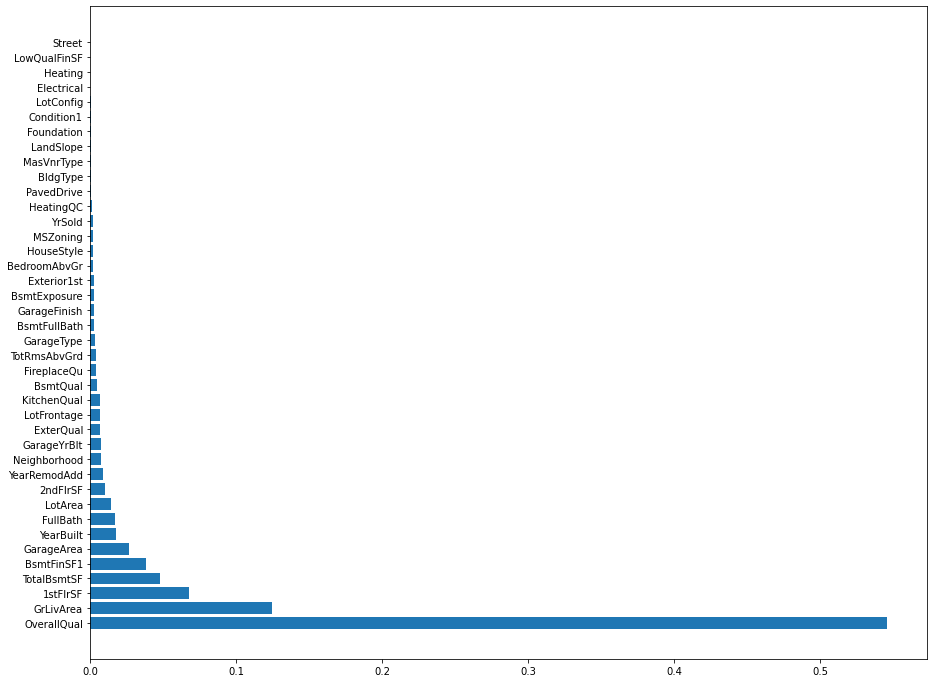

In [92]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(15,12))
plt.barh(features, importance)

In [93]:
# 2nd GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [2, 12, 25, 37 ,50], #use min_samples_split instead of setting value to max_depth 
    'n_estimators': [100], # 1st GridSearch best_param gave 'n_estimators': 100 so we leave it as is.  
    'bootstrap':[True],
    'max_features': [2,6,15,30]   #changed from default of 40 in 1st GridSearch to this.  BEAT TO DEATH 1st 
}

# use min_samples_split instead of setting value to max_depth. Because 1st GridSearch best_param for max_depth = 11. 
# no need to venture further than 11 because our # of observation is 2580 (2 to the power of (11-12))

In [94]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 12.2 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [2, 6, 15, 30],
                         'min_samples_split': [2, 12, 25, 37, 50],
                         'n_estimators': [100]},
             return_train_score=True)

In [95]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 30,
 'min_samples_split': 12,
 'n_estimators': 100}

In [96]:
# get the best score
grid_search_forest.best_score_


0.8759069174293963

In [97]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98290
# The test R2 is: 0.90190

# AFTER 1st GRID SEARCH
# The R2 training is: 0.97879
# The R2 test     is: 0.90057

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.95978
# The R2 test     is: 0.90036

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.96077
# The R2 test     is: 0.90137

The R2 training is: 0.95978
The R2 test     is: 0.90036


In [98]:
# 3rd GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [12], # 1st [2, 12, 25, 37 ,50], Next one to beat to death
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [20, 25, 30, 35] # 2nd GridSearch best_param was 15 so we want to explore more around 15.  [6,15,30]
}  

# {'bootstrap': True,
#  'criterion': 'mse',
#  'max_features': 15,
#  'min_samples_split': 12, NEXT 
#  'n_estimators': 100}

In [99]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 9 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [20, 25, 30, 35],
                         'min_samples_split': [12], 'n_estimators': [100]},
             return_train_score=True)

In [100]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 12,
 'n_estimators': 100}

In [101]:
# get the best score
grid_search_forest.best_score_

0.8777963993007762

In [102]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98290
# The test R2 is: 0.90190

# AFTER 1st GRID SEARCH
# The R2 training is: 0.97879
# The R2 test     is: 0.90057

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.95978
# The R2 test     is: 0.90036

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.96077
# The R2 test     is: 0.90137

The R2 training is: 0.96077
The R2 test     is: 0.90137


In [106]:
# 4th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [12], #min_samples_split': hover around here for next [2, 12, 25] 
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [18, 19, 20, 21]  # 3rd Grid:[20, 25, 30, 35]
}  

In [107]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 3.9 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [18, 19, 20, 21],
                         'min_samples_split': [12], 'n_estimators': [100]},
             return_train_score=True)

In [108]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 12,
 'n_estimators': 100}

In [109]:
# get the best score
grid_search_forest.best_score_

0.8777963993007762

In [110]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))


# WITHOUT GRID SEARCH
# The training R2 is: 0.98290
# The test R2 is: 0.90190

# AFTER 1st GRID SEARCH
# The R2 training is: 0.97879
# The R2 test     is: 0.90057

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.95978
# The R2 test     is: 0.90036

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.96077
# The R2 test     is: 0.90137

# AFTER 4th GRID SEARCH - No score improvement so we have found the optimal to be 'max_features': 20
# The R2 training is: 0.96077
# The R2 test     is: 0.90137


The R2 training is: 0.96077
The R2 test     is: 0.90137


In [111]:
# 5th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [7, 10, 12, 14, 17], #min_samples_split': [2, 12, 25, 37 ,50] 
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [20] 
}  

#The 5th GridSearch best_param for min_samples_split returned 14 resulted in better test R2.  so we want to go to 14 

In [112]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 4.93 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [20],
                         'min_samples_split': [7, 10, 12, 14, 17],
                         'n_estimators': [100]},
             return_train_score=True)

In [113]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 14,
 'n_estimators': 100}

In [114]:
# get the best score
grid_search_forest.best_score_

0.8778026490941429

In [115]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98290
# The test R2 is: 0.90190

# AFTER 1st GRID SEARCH
# The R2 training is: 0.97879
# The R2 test     is: 0.90057

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.95978
# The R2 test     is: 0.90036

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.96077
# The R2 test     is: 0.90137

# AFTER 4th GRID SEARCH - No score improvement so we have found the optimal to be 'max_features': 20
# The R2 training is: 0.96077
# The R2 test     is: 0.90137

# AFTER 5th GRID SEARCH
# The R2 training is: 0.95435
# The R2 test     is: 0.90147

The R2 training is: 0.95435
The R2 test     is: 0.90147


In [123]:
# 6th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [11,12,13,14], # previous grid: [7, 10, 12, 14, 17]. Found 14. Found 13
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [20] 
}  

#The 5th GridSearch best_param for min_samples_split returned 14 resulted in better test R2.  so we want to go to 14 

In [124]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 4 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [20],
                         'min_samples_split': [11, 12, 13, 14],
                         'n_estimators': [100]},
             return_train_score=True)

In [125]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 13,
 'n_estimators': 100}

In [126]:
# get the best score
grid_search_forest.best_score_

0.8783708863393219

In [127]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98290
# The test R2 is: 0.90190

# AFTER 1st GRID SEARCH
# The R2 training is: 0.97879
# The R2 test     is: 0.90057

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.95978
# The R2 test     is: 0.90036

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.96077
# The R2 test     is: 0.90137

# AFTER 4th GRID SEARCH - No score improvement so we have found the optimal to be 'max_features': 20
# The R2 training is: 0.96077
# The R2 test     is: 0.90137

# AFTER 5th GRID SEARCH
# The R2 training is: 0.95435
# The R2 test     is: 0.90147

# AFTER 6th GRID SEARCH
# The R2 training is: 0.95609
# The R2 test     is: 0.90198

# AFTER adjusted 6th GRID SEARCH - No score improvement so we have found the optimal to be min_samples_split': 13
# The R2 training is: 0.95609
# The R2 test     is: 0.90198

The R2 training is: 0.95609
The R2 test     is: 0.90198


In [145]:
# 7th GridSearch 
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [13], # previous grid: [7, 10, 12, 14, 17]. Found 14. Found 13
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [20] 
}  


In [146]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 4.8 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [20], 'min_samples_split': [13],
                         'n_estimators': [100]},
             return_train_score=True)

In [147]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 13,
 'n_estimators': 100}

In [148]:
# get the best score
grid_search_forest.best_score_

0.8783708863393219

In [149]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

# WITHOUT GRID SEARCH
# The training R2 is: 0.98290
# The test R2 is: 0.90190

# AFTER 1st GRID SEARCH
# The R2 training is: 0.97879
# The R2 test     is: 0.90057

# AFTER 2nd GRID SEARCH
# The R2 training is: 0.95978
# The R2 test     is: 0.90036

# AFTER 3rd GRID SEARCH
# The R2 training is: 0.96077
# The R2 test     is: 0.90137

# AFTER 4th GRID SEARCH - No score improvement so we have found the optimal to be 'max_features': 20
# The R2 training is: 0.96077
# The R2 test     is: 0.90137

# AFTER 5th GRID SEARCH
# The R2 training is: 0.95435
# The R2 test     is: 0.90147

# AFTER 6th GRID SEARCH
# The R2 training is: 0.95609
# The R2 test     is: 0.90198

# AFTER adjusted 6th GRID SEARCH - No score improvement so we have found the optimal to be min_samples_split': 13
# The R2 training is: 0.95609
# The R2 test     is: 0.90198

# AFTER 7th GRID SEARCH - No overall score improvement and hyperparameter tuning has been exhausted.  
# The R2 training is: 0.95609
# The R2 test     is: 0.90198

# ORIGINAL SCORE BEFORE GRID SEARCH
# The training R2 is: 0.98290
# The test R2 is: 0.90190


The R2 training is: 0.95609
The R2 test     is: 0.90198


In [152]:
# (3)What's the first 5 important features? Again please plot the sorted feature scores by barh
tree_final = grid_search_forest.best_estimator_
feature_importance = list(zip(x_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('OverallQual', 0.32761894482116005),
 ('GrLivArea', 0.13024149248351372),
 ('ExterQual', 0.10554852621697865),
 ('YearBuilt', 0.07076518354677006),
 ('1stFlrSF', 0.06380233563333837),
 ('TotalBsmtSF', 0.06007218433230767),
 ('GarageArea', 0.053351968498983826),
 ('BsmtFinSF1', 0.03349075398223671),
 ('KitchenQual', 0.021880591604140222),
 ('FullBath', 0.017798412076031615),
 ('GarageYrBlt', 0.014583011454210952),
 ('LotArea', 0.013521893328278179),
 ('2ndFlrSF', 0.01226282374862453),
 ('BsmtQual', 0.01056034042382588),
 ('FireplaceQu', 0.008836654096275398),
 ('GarageType', 0.007315377297398056),
 ('LotFrontage', 0.006855630798428151),
 ('YearRemodAdd', 0.006635335022127939),
 ('Neighborhood', 0.006531997130137188),
 ('TotRmsAbvGrd', 0.004414335161796854),
 ('BsmtFullBath', 0.003369360328423162),
 ('BsmtExposure', 0.0029795768484511113),
 ('GarageFinish', 0.002227144459248511),
 ('BedroomAbvGr', 0.0020638856440773805),
 ('Exterior1st', 0.001947458358347367),
 ('HouseStyle', 0.0015630

<BarContainer object of 40 artists>

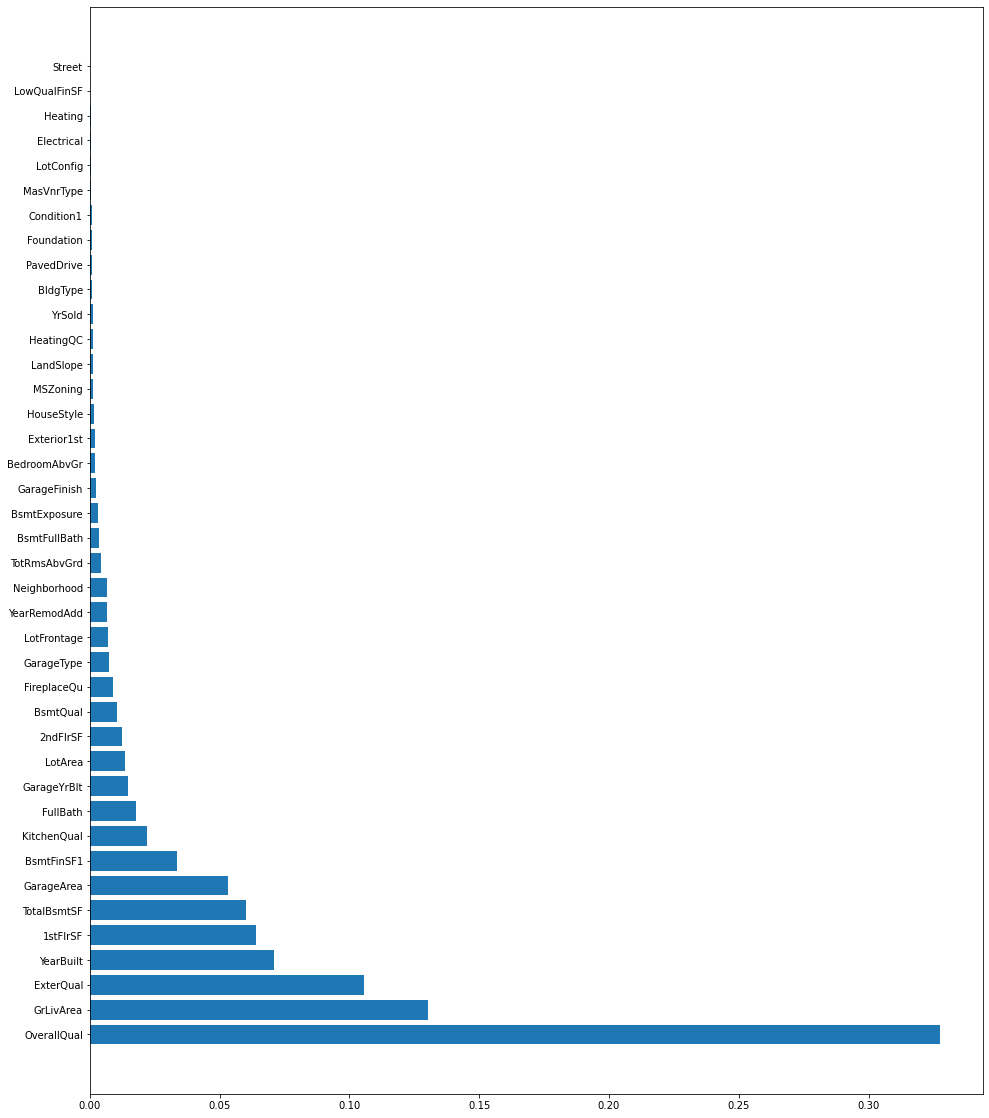

In [151]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(16,20))
plt.barh(features, importance)

In [167]:
features = housing_encoded.drop(['SalePrice'], axis=1)
features.head()


GrLivArea  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
1        856         59.0     7890            6       1939          1950   
2       1049         42.0     4235            5       1984          1984   
3       1001         60.0     6060            5       1930          2007   
4       1039         80.0     8146            4       1900          2003   
5       1665         70.0     8400            8       2001          2001   

   BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
1       238.0        856.0       856         0             0           1.0   
2       552.0       1049.0      1049         0             0           1.0   
3       737.0        837.0      1001         0             0           0.0   
4         0.0        405.0       717       322             0           0.0   
5       643.0        810.0       810       855             0           1.0   

   FullBath  BedroomAbvGr  TotRmsAbvGrd  GarageYrBlt  GarageArea  YrSold  \
1         1             2             4       1939.0       399.0    2010   
2         2             2             5       1984.0       266.0    2009   
3         1             2             5       1930.0       216.0    2007   
4         1             2             6       1940.0       281.0    2009   
5         2             3             6       2001.0       528.0    2009   

   MSZoning  Street  LotConfig  Neighborhood  Condition1  BldgType  \
1         5       1          0            21           2         0   
2         5       1          4             7           2         4   
3         1       1          4            11           2         0   
4         5       1          0            20           2         0   
5         5       1          4            17           2         0   

   HouseStyle  Exterior1st  MasVnrType  Foundation  Heating  GarageType  \
1           2           13           3           1        1           5   
2           2            6           1           1        1           1   
3           2            8           3           0        1           5   
4           5            8           3           0        1           5   
5           5           12           3           2        1           1   

   LandSlope  ExterQual  BsmtQual  BsmtExposure  HeatingQC  Electrical  \
1          1          3         4             2          3           5   
2          1          4         5             3          3           5   
3          1          4         4             2          5           5   
4          1          4         3             2          4           5   
5          1          4         5             2          5           5   

   KitchenQual  FireplaceQu  GarageFinish  PavedDrive  
1            3            5             2           3  
2            4            1             4           3  
3            4            1             2           1  
4            3            1             2           1  
5            4            1             4           3

In [168]:
features1 = features.drop(['MasVnrType','Electrical','LotConfig','LowQualFinSF','Heating','Street'], axis=1) 
features1.shape

(2580, 34)

In [169]:
#Split the data set into two parts: training set and test set(with random_state=0, and test_size=0.3)

x_train, x_test, y_train, y_test = train_test_split(features1, target, random_state=0, test_size=0.3)

In [170]:
# (1)
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()

# fit RF model on training set 
randomForest.set_params(random_state=0)
randomForest.fit(x_train, np.ravel(y_train)) 

RandomForestRegressor(random_state=0)

In [171]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [172]:
print("The training R2 is: %.5f" % (randomForest.score(x_train, y_train)))
print("The test R2 is: %.5f" % (randomForest.score(x_test, y_test)))

The training R2 is: 0.98292
The test R2 is: 0.90284


In [175]:
# AFTER CUTTING 6 FEATURES (34 FEATURES - RUN BEST PARAMETERS)
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'], 
    'min_samples_split': [13], # previous grid: [7, 10, 12, 14, 17]. Found 14. Found 13
    'n_estimators': [100],
    'bootstrap':[True],
    'max_features': [20] 
}  


In [176]:
# run the RF regressor through the grid search 
grid_search_forest = ms.GridSearchCV(
    randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(x_train, np.ravel(y_train))   # %time     is ipython magic command to measure the execution time

Wall time: 5.01 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [20], 'min_samples_split': [13],
                         'n_estimators': [100]},
             return_train_score=True)

In [177]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 20,
 'min_samples_split': 13,
 'n_estimators': 100}

In [178]:
# get the best score
grid_search_forest.best_score_

0.8758202412408534

In [179]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(x_train, y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(x_test, y_test)))

The R2 training is: 0.95664
The R2 test     is: 0.90005


In [181]:
#BECAUSE REMOVING THE LEAST IMPORTANT 6 FEATURES WORSENS THE TRAINING AND TEST R2 SCORES, WE KEEP ALL 40 FEATURES.  

In [188]:
actual_y = y_test

In [191]:
from sklearn.ensemble import RandomForestRegressor
randomForestPlot = RandomForestRegressor(
    criterion='mse', min_samples_split=13, n_estimators=100, bootstrap=True, max_features=20)

# fit RF model on training set 
randomForestPlot.set_params(random_state=0)
randomForestPlot.fit(x_train, np.ravel(y_train))

RandomForestRegressor(max_features=20, min_samples_split=13, random_state=0)

In [192]:
randomForestPlot.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 20,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [247]:
#Predicted Price from test dataset w.r.t Random Forest Regression
predict_y = randomForestPlot.predict((x_test))

In [250]:
predict_y=pd.DataFrame(predict_y)
type(predict_y)

pandas.core.frame.DataFrame

In [251]:
actual_y=pd.DataFrame(actual_y)
type(actual_y)

pandas.core.frame.DataFrame

In [255]:
splot = pd.concat([actual_y, predict_y], axis=1)
splot.columns = ['actual house price', 'predicted house price']
splot

actual house price  predicted house price
0                142100          138206.806917
1                135000          145218.753989
2                 68400          101163.598102
3                244600          239073.835269
4                143500          148576.004471
5                147000          153119.625148
6                191000          197752.327890
7                159900          150889.775562
8                 88250           87743.419458
9                146900          132557.210618
10               268500          266541.951600
11               203135          193632.761565
12               292500          265768.013353
13               328000          250294.528164
14                98000          115395.016117
15               129000          125260.500211
16               180000          185253.466784
17               334000          318810.300925
18               185000          158241.339762
19               138000          135834.193123
20               282000          354096.530560
21               176000          179140.452809
22               140000          145233.676513
23               228500          218778.064198
24               260000          263128.476834
25               129500          132602.987122
26               255000          221402.088795
27                75190           94247.530151
28               128000          111960.898837
29                96900          101030.589752
30               134000          147083.476430
31               144800          131601.342585
32               154000          150949.741028
33               200000          210056.592848
34               155000          155308.545193
35               207000          180573.298615
36               137000          124550.308200
37               117600          116946.547472
38               139000          137834.405181
39               136500          142278.307382
40               200500          222632.017540
41               199900          214607.021702
42               325000          311058.841250
43               154900          111890.077497
44               167000          172824.276407
45               181000          190606.097003
46                55000           81795.130148
47               125200          142491.421291
48               244400          211228.241617
49               256000          200419.365805
50               144500          145960.293467
51               181000          201963.952068
52               146300          143647.714445
53               167000          226996.421580
54               193000          211089.476424
55               237500          209441.485345
56               135500          129199.109506
57               155000          153581.129172
58               214000          224956.679113
59               123000          159397.400965
60               425000          388899.206163
61                97000          108713.209426
62               106000          107866.071936
63               335000          263195.679875
64                92900           96033.001483
65               207000          196477.110247
66               146500          149463.768343
67               207500          243923.656319
68               437154          438631.240373
69               130000          127548.860585
70               200000          190869.630855
71               202500          212497.391662
72               125500          130685.138907
73                72000           95736.078728
74               188000          182950.667679
75               125000          125016.396387
76               129000          138674.719791
77               275000          249700.528865
78               165600          174895.675712
79               159000          171600.061681
80               412500          359887.486040
81               135000          132631.339392
82               378000          348851.123125
83               145000          142256.924652
84        

<AxesSubplot:xlabel='actual house price', ylabel='predicted house price'>

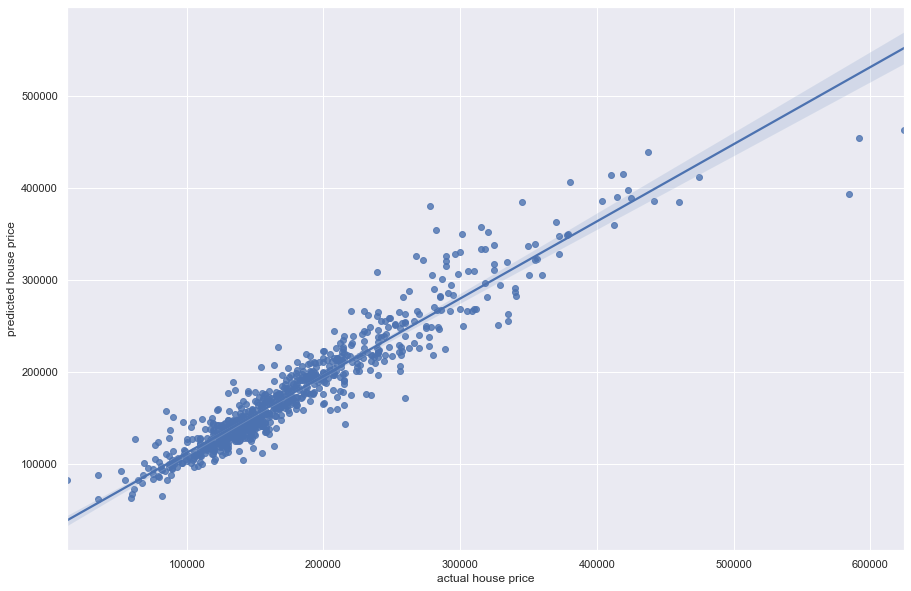

In [290]:
f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='actual house price', y='predicted house price', data=splot, ax=ax)